In [2]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])
from scipy.odr import ODR, Model, Data, RealData
from scipy.optimize import curve_fit
import ipywidgets as widgets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [120]:
# FITTING FUNCTIONS
def linearODR(B,x):
    return B[0]*x + B[1]

# SCATTER PLOT
def scatterPlot(xdata, ydata, x_label, y_label, color):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.scatter(xdata,ydata, color=color, s=25)
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
def LinearPlotODR(xdata,ydata,error_y,error_x,a,b,function,output,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(output.beta, xdata),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    #plt.xticks(np.arange(min(xdata), max(xdata), (max(xdata)-min(xdata))/5))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.legend(prop={'size': 12}, loc=1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

## WEEK 1 ---------------------------------------------------------------

In [26]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = 'Week_1'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Response} (mV)$,$Time (s)$,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$Ln(T)$,$Ln(T-T_{env})$,$V_{Thermopile} (mV)$,$Ln(V_{Thermopile})$,$Uncertainty (mV)$
0,7.600,10,23.94,0.01,0.69,0.01,34.695652,1567.758921,7.357402,7.148785,2.257,0.814036,0.001
1,8.700,20,29.54,0.01,0.77,0.01,38.363636,1702.903932,7.440090,7.249715,3.107,1.133658,0.001
2,9.030,30,35.80,0.01,0.86,0.01,41.627907,1821.254315,7.507281,7.330441,4.212,1.437938,0.001
3,9.170,40,42.20,0.01,0.94,0.01,44.893617,1938.020880,7.569423,7.404170,5.566,1.716677,0.001
4,9.270,50,48.20,0.01,1.01,0.01,47.722772,2037.963689,7.619706,7.463227,6.841,1.922934,0.001
5,9.350,60,54.00,0.01,1.07,0.01,50.467290,2133.917271,7.665715,7.516823,8.264,2.111909,0.001
6,9.520,90,60.10,0.01,1.14,0.01,52.719298,2211.961527,7.701635,7.558392,9.663,2.268304,0.001
7,9.604,120,66.80,0.01,1.21,0.01,55.206612,2297.477335,7.739567,7.602040,11.455,2.438426,0.001
8,9.667,150,72.00,0.01,1.26,0.01,57.142857,2363.574297,7.767930,7.634518,12.597,2.533459,0.001
9,9.723,180,78.90,0.01,1.33,0.01,59.323308,2437.534623,7.798742,7.669651,14.500,2.674149,0.001


In [27]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

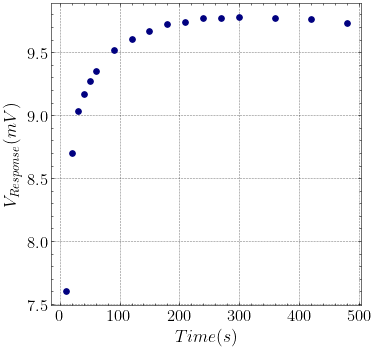

In [5]:
xdata, ydata = df[drop_down_x.value], df[drop_down_y.value]
scatterPlot(xdata,ydata, drop_down_x.value, drop_down_y.value, 'navy')

In [16]:
# FUNCTIONS FOR GENERATING ERRORS
def vir(parameters): #V, I
    return parameters[0]/parameters[1]

def inverse(parameters): #T
    return 1/parameters[0]

def ln(parameters):
    return np.log(parameters[0])

def calc_temperature(parameters): #[R,c]
    return 300*(parameters[0]/4.65)**parameters[1]

In [31]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error ln(T)'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], ln), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Thermopile} (mV)$']], [x['$Uncertainty (mV)$']], ln), axis=1)
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (…

In [32]:
df

,$V_{Response} (mV)$,$Time (s)$,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$Ln(T)$,$Ln(T-T_{env})$,$V_{Thermopile} (mV)$,$Ln(V_{Thermopile})$,$Uncertainty (mV)$,Error R,Error T,Error ln(T),Error ln(V)
0,7.600,10,23.94,0.01,0.69,0.01,34.695652,1567.758921,7.357402,7.148785,2.257,0.814036,0.001,0.503150,18.824906,0.012008,0.000443
1,8.700,20,29.54,0.01,0.77,0.01,38.363636,1702.903932,7.440090,7.249715,3.107,1.133658,0.001,0.498482,18.364644,0.010785,0.000322
2,9.030,30,35.80,0.01,0.86,0.01,41.627907,1821.254315,7.507281,7.330441,4.212,1.437938,0.001,0.484251,17.637030,0.009684,0.000237
3,9.170,40,42.20,0.01,0.94,0.01,44.893617,1938.020880,7.569423,7.404170,5.566,1.716677,0.001,0.477764,17.225218,0.008888,0.000180
4,9.270,50,48.20,0.01,1.01,0.01,47.722772,2037.963689,7.619706,7.463227,6.841,1.922934,0.001,0.472653,16.911724,0.008299,0.000146
5,9.350,60,54.00,0.01,1.07,0.01,50.467290,2133.917271,7.665715,7.516823,8.264,2.111909,0.001,0.471791,16.767448,0.007858,0.000121
6,9.520,90,60.10,0.01,1.14,0.01,52.719298,2211.961527,7.701635,7.558392,9.663,2.268304,0.001,0.462569,16.373572,0.007402,0.000103
7,9.604,120,66.80,0.01,1.21,0.01,55.206612,2297.477335,7.739567,7.602040,11.455,2.438426,0.001,0.456359,16.088958,0.007003,0.000087
8,9.667,150,72.00,0.01,1.26,0.01,57.142857,2363.574297,7.767930,7.634518,12.597,2.533459,0.001,0.453613,15.946611,0.006747,0.000079
9,9.723,180,78.90,0.01,1.33,0.01,59.323308,2437.534623,7.798742,7.669651,14.500,2.674149,0.001,0.446128,15.652188,0.006421,0.000069


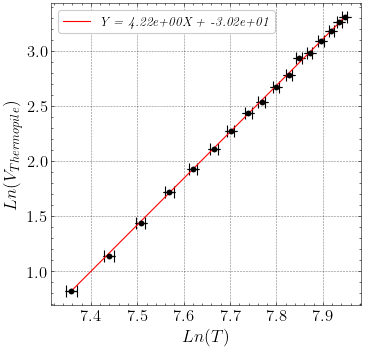

In [33]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'red',drop_down_x.value,drop_down_y.value)

In [34]:
print('The slope is: (', slope, ' ± ', slope_error, ')')

The slope is: ( 4.220436443969357  ±  0.04198809972364201 )


In [35]:
# DETERMING THE %ERROR
slope_theor = 4
error = abs((slope-slope_theor)/slope_theor)*100
print("Percentage error: ", error, "%")

Percentage error:  5.510911099233917 %


## WEEK 2 ---------------------------------------------------------------

# 600 nm

In [90]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = '600nm'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$1/T (K^{-1})$,$V_{Output} (mV)$,$Error V output (mV)$,$Ln(V_{Output})$
0,36.9,0.01,0.87,0.01,42.413793,1849.497796,0.000541,1.81,0.001,0.593327
1,41.0,0.01,0.92,0.01,44.565217,1926.348673,0.000519,2.98,0.001,1.091923
2,47.1,0.01,1.00,0.01,47.100000,2016.055889,0.000496,5.36,0.001,1.678964
3,52.7,0.01,1.06,0.01,49.716981,2107.779000,0.000474,8.60,0.001,2.151762
4,58.8,0.01,1.12,0.01,52.500000,2204.388009,0.000454,13.12,0.001,2.574138
5,63.5,0.01,1.18,0.01,53.813559,2249.669242,0.000445,18.11,0.001,2.896464
6,69.1,0.01,1.23,0.01,56.178862,2330.717177,0.000429,24.69,0.001,3.206398
7,75.5,0.01,1.30,0.01,58.076923,2395.317716,0.000417,34.38,0.001,3.537475
8,81.4,0.01,1.35,0.01,60.296296,2470.381923,0.000405,44.51,0.001,3.795714
9,87.0,0.01,1.40,0.01,62.142857,2532.463872,0.000395,56.15,0.001,4.028027


In [92]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error 1/T'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], inverse), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Output} (mV)$']], [x['$Error V output (mV)$']], ln), axis=1)
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

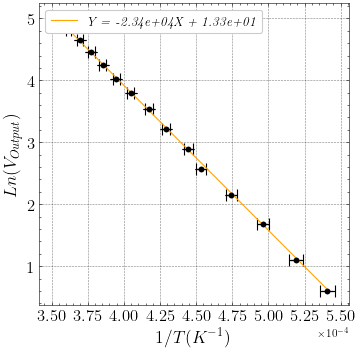

In [93]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'orange',drop_down_x.value,drop_down_y.value)

In [94]:
print("Slope: (", slope, " ± ", slope_error, ") K")

Slope: ( -23420.40581808733  ±  204.1022961921845 ) K


# 800 nm

In [95]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = '800nm'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$1/T (K^{-1})$,$V_{Output} (mV)$,$Error V output (mV)$,$Ln(V_{Output})$
0,35.3,0.01,0.85,0.01,41.529412,1817.707925,0.000550,8.50,0.001,2.140066
1,41.5,0.01,0.93,0.01,44.623656,1928.426847,0.000519,15.01,0.001,2.708717
2,47.0,0.01,1.00,0.01,47.000000,2012.533335,0.000497,22.75,0.001,3.124565
3,51.9,0.01,1.05,0.01,49.428571,2097.713204,0.000477,31.14,0.001,3.438493
4,58.5,0.01,1.13,0.01,51.769911,2179.133657,0.000459,34.98,0.001,3.554776
5,63.6,0.01,1.18,0.01,53.898305,2252.583840,0.000444,57.56,0.001,4.052828
6,69.3,0.01,1.24,0.01,55.887097,2320.752933,0.000431,73.12,0.001,4.292102
7,75.4,0.01,1.30,0.01,58.000000,2392.706989,0.000418,92.67,0.001,4.529045
8,81.4,0.01,1.35,0.01,60.296296,2470.381923,0.000405,113.61,0.001,4.732772
9,86.3,0.01,1.40,0.01,61.642857,2515.686389,0.000398,131.80,0.001,4.881286


In [97]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error 1/T'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], inverse), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Output} (mV)$']], [x['$Error V output (mV)$']], ln), axis=1)
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

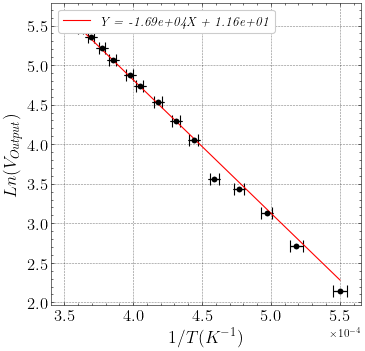

In [98]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'red',drop_down_x.value,drop_down_y.value)

In [99]:
print("Slope: (", slope, " ± ", slope_error, ") K")

Slope: ( -16861.577987033525  ±  342.6592217177991 ) K


# 1200 nm

In [100]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = '1200nm'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$1/T (K^{-1})$,$V_{Output} (mV)$,$Error V output (mV)$,$Ln(V_{Output})$
0,35.6,0.01,0.85,0.01,41.882353,1830.408953,0.000546,10.56,0.001,2.357073
1,41.3,0.01,0.93,0.01,44.408602,1920.776782,0.000521,14.89,0.001,2.700690
2,47.0,0.01,1.00,0.01,47.000000,2012.533335,0.000497,19.76,0.001,2.983660
3,52.2,0.01,1.06,0.01,49.245283,2091.310842,0.000478,24.48,0.001,3.197856
4,57.8,0.01,1.12,0.01,51.607143,2173.494780,0.000460,30.39,0.001,3.414114
5,63.9,0.01,1.19,0.01,53.697479,2245.675657,0.000445,36.94,0.001,3.609295
6,69.3,0.01,1.24,0.01,55.887097,2320.752933,0.000431,42.85,0.001,3.757706
7,75.6,0.01,1.30,0.01,58.153846,2397.927830,0.000417,50.16,0.001,3.915218
8,81.3,0.01,1.35,0.01,60.222222,2467.884562,0.000405,57.10,0.001,4.044804
9,87.8,0.01,1.41,0.01,62.269504,2536.709684,0.000394,65.10,0.001,4.175925


In [102]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error 1/T'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], inverse), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Output} (mV)$']], [x['$Error V output (mV)$']], ln), axis=1)
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

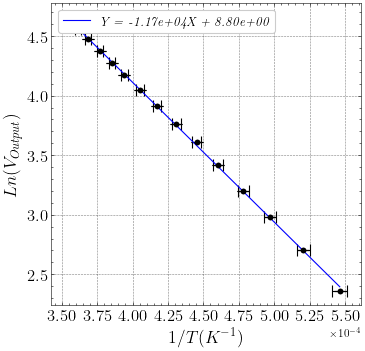

In [103]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'blue',drop_down_x.value,drop_down_y.value)

In [104]:
print("Slope: (", slope, " ± ", slope_error, ") K")

Slope: ( -11729.649181127745  ±  100.30464488652193 ) K


# 1600 nm

In [105]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = '1600nm'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$1/T (K^{-1})$,$V_{Output} (mV)$,$Error V output (mV)$,$Ln(V_{Output})$
0,34.9,0.01,0.84,0.01,41.547619,1818.363603,0.000550,14.4,0.001,2.667228
1,41.3,0.01,0.93,0.01,44.408602,1920.776782,0.000521,19.4,0.001,2.965273
2,46.9,0.01,0.99,0.01,47.373737,2025.691669,0.000494,24.3,0.001,3.190476
3,53.5,0.01,1.07,0.01,50.000000,2117.646597,0.000472,30.2,0.001,3.407842
4,58.8,0.01,1.13,0.01,52.035398,2188.324314,0.000457,34.5,0.001,3.540959
5,63.9,0.01,1.18,0.01,54.152542,2261.322769,0.000442,39.1,0.001,3.666122
6,69.6,0.01,1.24,0.01,56.129032,2329.016069,0.000429,44.5,0.001,3.795489
7,75.6,0.01,1.30,0.01,58.153846,2397.927830,0.000417,50.2,0.001,3.916015
8,81.8,0.01,1.36,0.01,60.147059,2465.349919,0.000406,55.8,0.001,4.021774
9,86.9,0.01,1.40,0.01,62.071429,2530.068557,0.000395,61.2,0.001,4.114147


In [107]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error 1/T'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], inverse), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Output} (mV)$']], [x['$Error V output (mV)$']], ln), axis=1)
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

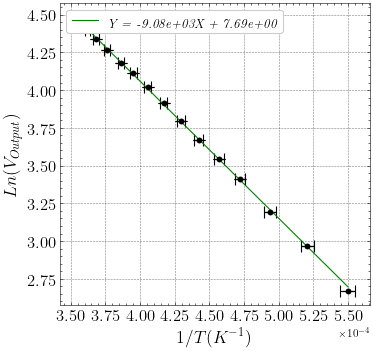

In [108]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'green',drop_down_x.value,drop_down_y.value)

In [55]:
print("Slope: (", slope, " ± ", slope_error, ") K")

Slope: ( -9083.816382443285  ±  70.5434029798713 ) K


# 2000 nm

In [109]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = '2000nm'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$1/T (K^{-1})$,$V_{Output} (mV)$,$Error V output (mV)$,$Ln(V_{Output})$
0,34.9,0.01,0.84,0.01,41.547619,1818.363603,0.000550,18.43,0.001,2.913980
1,41.5,0.01,0.93,0.01,44.623656,1928.426847,0.000519,22.41,0.001,3.109507
2,47.0,0.01,1.00,0.01,47.000000,2012.533335,0.000497,25.44,0.001,3.236323
3,52.9,0.01,1.06,0.01,49.905660,2114.358500,0.000473,28.43,0.001,3.347445
4,58.7,0.01,1.13,0.01,51.946903,2185.261687,0.000458,31.09,0.001,3.436886
5,62.9,0.01,1.17,0.01,53.760684,2247.850320,0.000445,32.88,0.001,3.492865
6,69.9,0.01,1.24,0.01,56.370968,2337.272895,0.000428,35.65,0.001,3.573749
7,81.2,0.01,1.36,0.01,59.705882,2450.461323,0.000408,39.73,0.001,3.682107
8,87.7,0.01,1.41,0.01,62.198582,2534.332218,0.000395,41.50,0.001,3.725693
9,92.9,0.01,1.46,0.01,63.630137,2582.229063,0.000387,43.01,0.001,3.761433


In [110]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error 1/T'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], inverse), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Output} (mV)$']], [x['$Error V output (mV)$']], ln), axis=1)
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

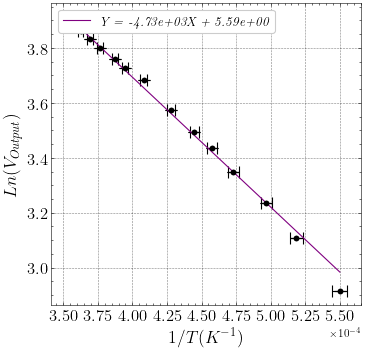

In [111]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'purple',drop_down_x.value,drop_down_y.value)

In [62]:
print("Slope: (", slope, " ± ", slope_error, ") K")

Slope: ( -4731.728878968731  ±  94.41370888875296 ) K


# 2400 nm

In [112]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = '2400nm'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$1/T (K^{-1})$,$V_{Output} (mV)$,$Error V output (mV)$,$Ln(V_{Output})$
0,35.0,0.01,0.84,0.01,41.666667,1822.649477,0.000549,10.08,0.001,2.310553
1,41.4,0.01,0.93,0.01,44.516129,1924.602633,0.000520,12.28,0.001,2.507972
2,47.0,0.01,0.99,0.01,47.474747,2029.244813,0.000493,14.10,0.001,2.646175
3,52.8,0.01,1.06,0.01,49.811321,2111.069302,0.000474,15.86,0.001,2.763800
4,58.6,0.01,1.12,0.01,52.321429,2198.216860,0.000455,17.53,0.001,2.863914
5,63.8,0.01,1.18,0.01,54.067797,2258.410602,0.000443,18.97,0.001,2.942859
6,69.6,0.01,1.24,0.01,56.129032,2329.016069,0.000429,20.39,0.001,3.015045
7,75.8,0.01,1.30,0.01,58.307692,2403.146225,0.000416,21.92,0.001,3.087399
8,81.5,0.01,1.35,0.01,60.370370,2472.878740,0.000404,23.21,0.001,3.144583
9,87.7,0.01,1.41,0.01,62.198582,2534.332218,0.000395,24.56,0.001,3.201119


In [113]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error 1/T'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], inverse), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Output} (mV)$']], [x['$Error V output (mV)$']], ln), axis=1)
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)$…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Variac} (V)…

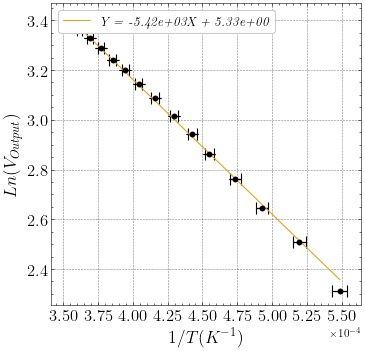

In [114]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'goldenrod',drop_down_x.value,drop_down_y.value)

In [115]:
print("Slope: (", slope, " ± ", slope_error, ") K")

Slope: ( -5416.4194607046065  ±  61.070314845936835 ) K


# Results

In [122]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = 'Results'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$\lambda \ (nm)$,$\frac{1}{\lambda} \ (m^{-1})$,Error lambda,$\frac{hc}{\lambda k} \ (K)$,Error slope
0,600,1.666667e+06,0,-23420.405820,204.102296
1,800,1.250000e+06,0,-16861.577990,342.659222
2,1200,8.333333e+05,0,-11729.649180,100.304645
3,1600,6.250000e+05,0,-9083.816382,70.543403
4,2000,5.000000e+05,0,-4731.728879,94.413709
5,2400,4.166667e+05,0,-5416.419461,61.070315


In [123]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$\\lambda \\ (nm…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$\\lambda \\ (nm…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$\\lambda \\ (n…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$\\lambda \\ (n…

/opt/anaconda3/lib/python3.8/site-packages/scipy/odr/odrpack.py:394: RuntimeWarning: divide by zero encountered in true_divide
  return 1./numpy.power(sd, 2)


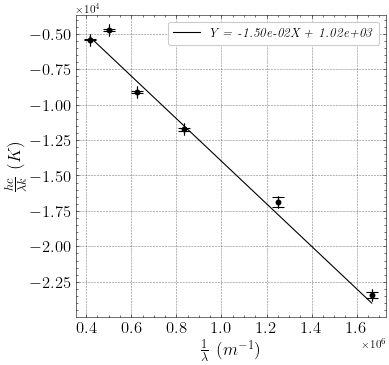

In [124]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [4,-100])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'black',drop_down_x.value,drop_down_y.value)

In [126]:
# CALCULATING FUNDAMENTAL CONSTANTS
from scipy.constants import c, h, k
slope = abs(slope)
slope_theor = h*c/k 
units = 'm-K'
print('Experimental hc/k: (', slope_theor, ' ± ', slope_error, ")", units)
print('Theoretical hc/k: ' + "{:.4e}".format(slope_theor) + ' ' + units)

# DETERMING THE %ERROR
error = abs((slope-slope_theor)/slope_theor)*100
print("Percentage error: ", error, "%")

Experimental hc/k: ( 0.014387768775039337  ±  0.001603444658588724 ) m-K
Theoretical hc/k: 1.4388e-02 m-K
Percentage error:  4.370132599502812 %
